In [1]:
import pandas as pd
import pyreadstat
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import econtools as econ
import econtools.metrics as mt
import math

In [2]:
df, meta = pyreadstat.read_sav("df.sav")

In [16]:
#pyreadstat.write_sav(df, 'df.sav')

### educational background ### 0. 둘다 고졸 이하 / 1. 한명 대졸 / 2. 두명 대졸 이상

In [3]:
df_HH1, meta = pyreadstat.read_sav("C:/Users/thxkn/OneDrive/바탕 화면/CV/박사지원서류/WS_HJ/KEEP/KEEPData_1-12Wave_Ver12/DATA(수능, 직업력, 가중치, 패널조사현황 자료 포함)/1-12차년도 DATA(SPSS)/1차년도(2004) DATA/중학교 3학년생 코호트/by_m_household.sav")
df_HH3, meta = pyreadstat.read_sav("C:/Users/thxkn/OneDrive/바탕 화면/CV/박사지원서류/WS_HJ/KEEP/KEEPData_1-12Wave_Ver12/DATA(수능, 직업력, 가중치, 패널조사현황 자료 포함)/1-12차년도 DATA(SPSS)/3차년도(2006) DATA/중학교 3학년생 코호트/f2_m_household.sav")
df_HH4, meta = pyreadstat.read_sav("C:/Users/thxkn/OneDrive/바탕 화면/CV/박사지원서류/WS_HJ/KEEP/KEEPData_1-12Wave_Ver12/DATA(수능, 직업력, 가중치, 패널조사현황 자료 포함)/1-12차년도 DATA(SPSS)/4차년도(2007) DATA/중학교 3학년생 코호트/f3_m_household.sav")


In [6]:
print(len(df_HH1))
print(len(df_HH3))
print(len(df_HH4))

1951
1684
2711


In [4]:
df_HH3 = df_HH3.rename(columns = {"F2H04001": "income"})
df_HH4 = df_HH4.rename(columns = {"F3H08001": "income"})
df_HH3 = df_HH3[df_HH3["income"]>0]
df_HH4 = df_HH4[df_HH4["income"]>0]

In [34]:
df_HH3['year'] = 2003
df_HH4['year'] = 2004

stu = df_HH3['BYSID'].to_list()

#middle school cohorts and detected in 2003 and 2004
stu4 = df_HH4.loc[df_HH4['BYSID'].isin(stu) == True, 'BYSID'].to_list()

# new cohorts
stu_new = df_HH4.loc[df_HH4['BYSID'].isin(stu) == False, 'BYSID'].to_list()

In [35]:
df['income'].max()

5000.0

In [36]:
df['perf'] = df['negativejudg'] + df['favorablejudg']
df['perfshare'] = df['perf'] / (df['perf']+ df['learning'])
df['income_new'] = df.loc[df['BYSID'].isin(stu_new) == True, 'income']
df['income_2003'] = df.loc[(df['year']==2003) & (df['BYSID'].isin(stu4) == True), 'income']
df['income_2004'] = df.loc[(df['year']==2004) & (df['BYSID'].isin(stu4) == True), 'income']

desc_stat = df[['GENDER', 'perf', 'perfshare', 'income_new', 'income_2003', 'income_2004']].describe().round(2)

In [37]:
desc_stat.to_latex('desc_stat.tex')

In [7]:
#관계
df_HH1.BYH01001.value_counts()
#2002 mother/ 2001 father

2002.0    1564
2001.0     346
1002.0      22
1001.0       5
4011.0       4
4001.0       4
1004.0       3
3001.0       2
4002.0       1
Name: BYH01001, dtype: int64

In [12]:
#residence
df_HH1.BYH01006.value_counts()

1.0    1919
2.0      32
Name: BYH01006, dtype: int64

In [13]:
#residence_not
df_HH1.BYH01007.value_counts()
#대부분 1: 학업, 직장/ 5: 불화

-5.0    1919
 1.0      23
 5.0       5
 3.0       2
 7.0       1
 4.0       1
Name: BYH01007, dtype: int64

In [14]:
#eduational background 
#5. highschool/ 7.4년제 대학/ 4 중학교 /3. 초등학교
df_HH1.BYH01008.value_counts()

 5.0    965
 7.0    378
 4.0    239
 3.0    126
 6.0     99
 2.0     71
 8.0     52
 9.0     17
-3.0      4
Name: BYH01008, dtype: int64

In [16]:
df_HH1.BYH05001.value_counts() 
#5. 박사로 갈 수록 학력수준 높아짐 1= 고등학교 이하


3.0    1226
5.0     381
2.0     178
4.0     140
1.0      26
Name: BYH05001, dtype: int64

In [30]:
df_HH1.BYH06002.value_counts()
#고교평준화
#1. 찬성 2. 반대 3. 모르겠다

1.0    1042
3.0     501
2.0     408
Name: BYH06002, dtype: int64

In [32]:
df_HH1.BYH06001.value_counts()
#정부정책 1관심없음

4.0    733
3.0    570
5.0    391
2.0    228
1.0     29
Name: BYH06001, dtype: int64

In [36]:
#삶 중요 1 #2. 소질 적성/ 1. 배우자
df_HH1.BYH07001.value_counts()

2.0     691
1.0     508
8.0     411
6.0     127
4.0      78
3.0      51
7.0      30
10.0     29
5.0      20
9.0       6
Name: BYH07001, dtype: int64

In [34]:
# 직업이유 1. money / 3. 자아실현
df_HH1.BYH07003.value_counts()

1.0    849
3.0    726
4.0    197
2.0    179
Name: BYH07003, dtype: int64

In [33]:
# 성공요인 = 자식과 비교하기
df_HH1.BYH07004.value_counts()

2.0    1237
4.0     346
3.0     236
1.0      61
5.0      43
7.0      13
8.0      10
6.0       5
Name: BYH07004, dtype: int64

보호자

In [37]:
#보호자 BYH10001
df_HH1.BYH10001.value_counts()

1.0    1767
3.0      97
2.0      63
4.0      18
6.0       6
Name: BYH10001, dtype: int64

In [38]:
#parents
df_HH1.BYH10002.value_counts()

 1.0    1736
 3.0     112
 2.0      79
-5.0      24
Name: BYH10002, dtype: int64

In [18]:
df_HH3.F2H01001.value_counts()
df_HH3.F2H01003.value_counts() #보호자 변동된 사람들 

-5.0    1644
 3.0      16
 1.0      13
 2.0       8
 4.0       2
 5.0       1
Name: F2H01003, dtype: int64

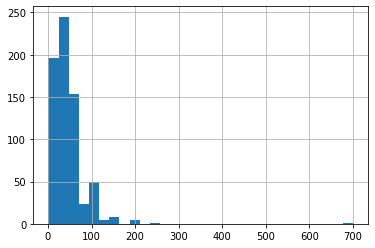

In [29]:
# 사교육비
df_HH3[df_HH3["F2H04005"]>0]["F2H04005"].hist(bins=30)

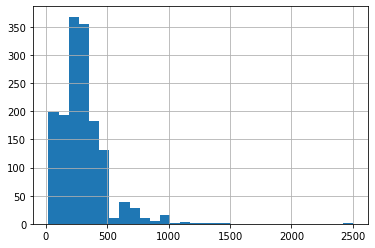

In [12]:
income = df_HH3.loc[df_HH3['income']<3000,'income'].hist(bins = 30)

In [13]:
df_HH3['income'].describe()

count    1552.000000
mean      307.427835
std       260.002661
min        20.000000
25%       180.000000
50%       280.000000
75%       400.000000
max      6000.000000
Name: income, dtype: float64

In [22]:
df_HH4['income'].describe()

count    2505.000000
mean      347.913772
std       254.143606
min         5.000000
25%       200.000000
50%       300.000000
75%       430.000000
max      5000.000000
Name: income, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

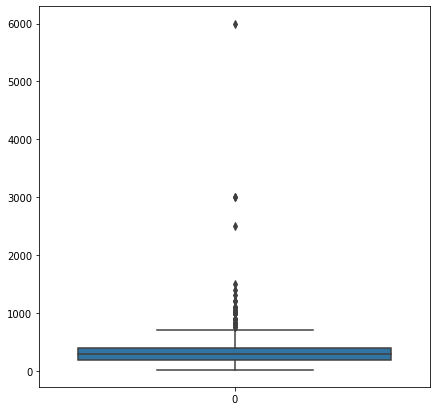

In [15]:
#outlier
def outliers(data):
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3-q1
    lower_bound = q1 - (iqr *1.5)
    upper_bound = q3 + (iqr * 1.5)

    return np.where((data > upper_bound)|(data < lower_bound))

plt.figure(figsize=(7,7))
sns.boxplot(data = df_HH3['income'])
plt.show

df_HH3.loc[df_HH3['income']>1500,'income'] = 1500
#outliers(df["income"])

<function matplotlib.pyplot.show(*args, **kw)>

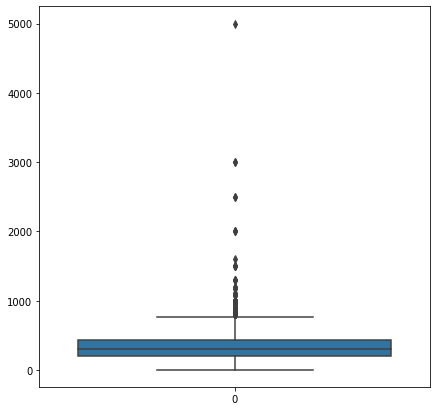

In [21]:
plt.figure(figsize=(7,7))
sns.boxplot(data = df_HH4['income'])
plt.show

In [35]:
df_HH4.loc[df_HH4['income']>1500,'income'] =1500

In [ ]:
df = pd.merge()

AttributeError: module 'matplotlib.pyplot' has no attribute 'get_figure'

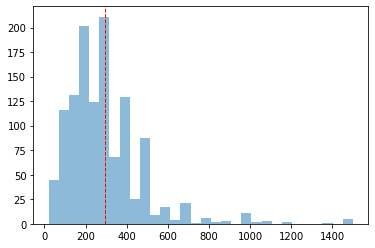

In [76]:
x = df_HH3.loc[df_HH3['BYSID'].isin(stu4) == True, 'income']
plt.hist(x, bins = 30, alpha = 0.5)
plt.axvline(x.mean(), color = 'red', linestyle = '--', linewidth = 1)
income_2003 = plt
figure =income_2003.get_figure()
figure.savefig('income_2003', dpi = 500)

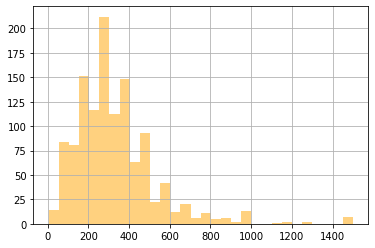

In [71]:
income_2004 = df_HH4.loc[df_HH4['BYSID'].isin(stu4) == True,'income'].hist(bins = 30, alpha = 0.5, color = 'orange')
figure = income_2004.get_figure()
figure.savefig('income_2004', dpi = 500)

In [37]:
stu = df_HH3['BYSID'].to_list()
stu4 = df_HH4.loc[df_HH4['BYSID'].isin(stu) == True, 'BYSID'].to_list()

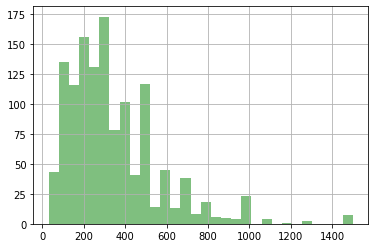

In [72]:
new_income = df_HH4.loc[df_HH4['BYSID'].isin(stu4)==False, 'income'].hist( bins = 30, alpha = 0.5, color = 'green')
figure = new_income.get_figure()
figure.savefig('new_income', dpi = 500)

In [ ]:
# get figure
income = df_HH3['income'].hist()
figure = income.get_figure()    
figure.savefig('goals_heatmap.png', dpi=400)

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

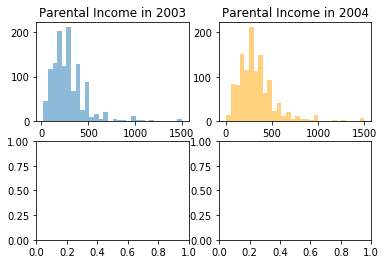

In [59]:
fig, ((ax0, ax1), ax2 ) = plt.subplots(nrows=2, ncols=2)

ax0.hist(df_HH3.loc[df_HH3['BYSID'].isin(stu4) == True, 'income'], bins = 30, alpha = 0.5)
ax0.set_title('Parental Income in 2003')

ax1.hist(df_HH4.loc[df_HH4['BYSID'].isin(stu4) == True,'income'], bins = 30, alpha = 0.5, color = 'orange')
ax1.set_title('Parental Income in 2004')

ax2.hist(df_HH4.loc[df_HH4['BYSID'].isin(stu4) == False,'income'], bins = 30, alpha = 0.5, color = 'orange')
ax2.set_title('Parental Income of New Cohort in 2004')


fig.tight_layout()
plt.show()

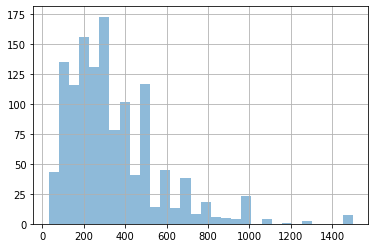

In [53]:
df_HH4.loc[df_HH4['BYSID'].isin(stu4) == False, 'income'].hist( bins = 30, alpha = 0.5)

In [60]:
df_HH4.loc[df_HH4['BYSID'].isin(stu4) == False, 'income']

2        950.0
13       350.0
36       120.0
46       150.0
49        50.0
         ...  
2705     150.0
2706     400.0
2707     400.0
2708     500.0
2710    1500.0
Name: income, Length: 1280, dtype: float64

In [61]:
df_HH4.loc[df_HH4['BYSID'].isin(stu4) == True,'income']

0        250.0
1        270.0
3        180.0
4        150.0
5        500.0
         ...  
1453     100.0
1454    1500.0
1457     250.0
1458     170.0
1459     400.0
Name: income, Length: 1225, dtype: float64